# CNN for binary classification of twitter sentiment

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("../../core/data/tweet_global_warming.csv", encoding="latin")
print("Full dataset: {}".format(data.shape[0]))
data = data.dropna()
print("dataset without NaN: {}".format(data.shape[0]))
X = data.iloc[:,0]
Y = data.iloc[:,1]
print("Number of unique words: {}".format(len(np.unique(np.hstack(X)))))

Full dataset: 6090
dataset without NaN: 4225
Number of unique words: 3889


In the following cell I use keras' Tokenizer class to convert the sentiment column (Yes, Y, No, or no) to binary 0 (yes) or 1 (no)

In [3]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
def shift_one(obj):
    return obj - 1
X = data.iloc[:,0]
Y = data.iloc[:,1]
Y = list(map(str, Y))
token = Tokenizer(num_words=top_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
          lower=True, split=' ', char_level=False, oov_token=None)
token.fit_on_texts(texts=X)
X = token.texts_to_sequences(texts=X)
token = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~eso',
          lower=True, split=' ', char_level=False, oov_token=None)
token.fit_on_texts(texts=Y)
Y = token.texts_to_sequences(texts=Y)
Y = np.array(Y)
Y = Y.reshape(Y.shape[0],)
Y = list(map(shift_one, Y))
Y = np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(X,Y)

# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words)) 
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128,
    verbose=1)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


/Users/wesleybeckner/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
/Users/wesleybeckner/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


/Users/wesleybeckner/anaconda/envs/py36/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3168 samples, validate on 1057 samples
Epoch 1/2
3168/3168 [==============================] - 5s 1ms/step - loss: 0.5815 - acc: 0.7323 - val_loss: 0.5609 - val_acc: 0.7389
Epoch 2/2
3168/3168 [==============================] - 4s 1ms/step - loss: 0.5147 - acc: 0.7371 - val_loss: 0.4664 - val_acc: 0.7616
Accuracy: 76.16%


average tweet length: 
16.575


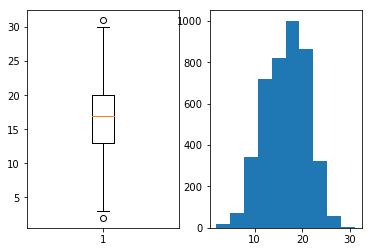

In [4]:
from matplotlib import pyplot
# Summarize review length
print("average tweet length: ")
result = map(len, X)
print("{:.3f}".format(np.mean(list(map(len, X)))))
pyplot.subplot(121)
pyplot.boxplot(list(map(len, X)))
pyplot.subplot(122)
pyplot.hist(list(map(len, X)))
pyplot.show()